In [ ]:
#instalando as bibliotecas necessarias

In [1]:
!pip install plotly --upgrade

     ---------------------------------------- 15.2/15.2 MB 2.8 MB/s eta 0:00:00
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [27]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 4.5 MB/s eta 0:00:00
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [2]:
#importando as bibliotecas necessarias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm #### biblioteca para plotar correlacao
import matplotlib.pyplot as plt

In [3]:
#exploração analitica dos dados

In [4]:
base_credit = pd.read_csv('./credit_data.csv')

In [5]:
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
base_credit.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [7]:
#clientid - id /nominal
#income - renda /discreto
#age - idade /nominal
#loan - emprestimo /discreto
#default - devedor /credor /ordinal
#base de dados historicos para identificar padrões para fazermos previsões

In [8]:
#uma breve analise inicial, pessoas mais jovens tendem a não pagar o emprestimo

In [9]:
#analise exploratória

In [10]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [11]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [12]:
#vizualização estatistica

In [13]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

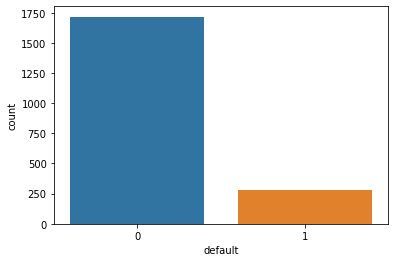

In [14]:
sns.countplot(x = base_credit['default']); #classe 0 -> paga o emprestimo, classe 1 -> não paga o emprestimo

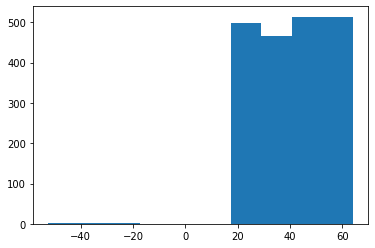

In [15]:
plt.hist(x = base_credit['age']);
#algumas idades negativas
#faz sentido? não
#portatno um tratamento de dados para valores inconsistentes deve ser aplicado
#antes de irmos para os modelos de aprendizagem demaquina

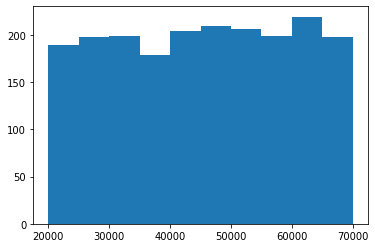

In [16]:
plt.hist(x = base_credit['income']);
#distribuição de frequência para renda

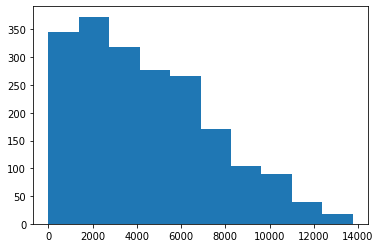

In [17]:
plt.hist(x = base_credit['loan']);
#distrinuição de frequência de dividas

In [18]:
grafio = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color= 'default')

In [19]:
grafico.show()
#podemos reparar a frequencia de emprestismo aumenta expressiivamen entre 18 e 40 anos
#e proporcionalmentoa aumenta de acordo com a renda

NameError: name 'grafico' is not defined

In [ ]:
#tratamento de valores inconsistentes

In [ ]:
#idades negativas, vamos remove-los

In [ ]:
base_credit.loc[base_credit['age'] < 0]

In [ ]:
base_credit[base_credit['age'] < 0]

In [ ]:
#vamos apagar essas linhas

In [ ]:
base_credit = base_credit.drop(base_credit[base_credit['age'] < 0].index)

In [ ]:
base_credit[base_credit['age'] < 0]

In [ ]:
#valores inconsistentes removidos

In [ ]:
#em alguns casos remover valores do dataframe pode ser prejudicial
#outra fomra de fazer isso é subistitutir os valores inconsistente por valore smédios
#isto é, trazer a media para esses valores
#fazedo isto você não altera a meda de seu target e metám o dataframe inteiro

In [ ]:
base_credit['age'].mean()

In [ ]:
#após isso, basta fazer a devida substituição

In [20]:
base_credit.isnull().sum()
#vamos aplicar a técnica de trazer a média os valores inconsistentes

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [21]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [22]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [23]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


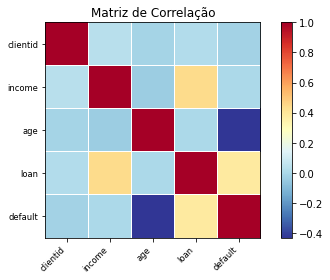

In [24]:
#trouxemos à média esses valores
correlacao = base_credit.corr()
#plotar correlação
sm.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

In [25]:
#vale lembrar que correlação não implica em casualidade
#e de fato, não existem ua correlação boa entre as variaveis

In [26]:
base_credit.corr()

,clientid,income,age,loan,default
clientid,1.000000,0.039280,-0.014673,0.018931,-0.020145
income,0.039280,1.000000,-0.033659,0.441117,0.002284
age,-0.014673,-0.033659,1.000000,0.002308,-0.429706
loan,0.018931,0.441117,0.002308,1.000000,0.377160
default,-0.020145,0.002284,-0.429706,0.377160,1.000000


In [27]:
#observando a correlação dos dados


In [28]:
#divisão entre classificadores e previsores
X_credit = base_credit.iloc[:, 1:4].values #colunas income,age,loan,default

In [29]:
#biblioteca apra padronizarmos os dados
from sklearn.preprocessing import StandardScaler

In [30]:
standard_credit = StandardScaler()

In [31]:
#X_credit = standard_credit.fit_transform(X_credit)

In [32]:
y_validation = base_credit.iloc[0:1500, 1:4].values

In [33]:
type(X_credit), type(y_validation), X_credit.shape, y_validation.shape

(numpy.ndarray, numpy.ndarray, (2000, 3), (1500, 3))

In [34]:
base_credit.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [35]:
base_credit = base_credit.drop(columns=['clientid'], axis=1)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_credit, base_credit, test_size = 0.25)

In [37]:
#usaremos um modelo de regressão lnear simples

In [38]:
from sklearn.linear_model import LinearRegression


In [39]:
X_train.shape, y_test.shape

((1500, 3), (500, 4))

In [40]:
reg = LinearRegression().fit(X_train, y_train)

In [41]:
reg.score(X_test, y_test)

0.8514697627162444

In [48]:
#uma acuracia e 85% não implica em um modelo bom
#vamos observar isso nas métricas

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_absolute_error

In [44]:
#valores preditos
y_pred = reg.predict(X_test)

In [50]:
y_pred.shape

(500, 4)

In [51]:
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

MAE: 0.05


In [52]:
#nosso erro médio absoluto é de 0.06
#de fato nosso modelo está bom
